# Growing Degree Days

This notebook loads temperature data saved in a CSV file, and analyzes it. It plots the temperatures, shows the highest and lowest value for each day, and calculates the GDD.

To use this notebook:

* Copy the `temperature.csv` file into the same folder as this notebook
* Run all the cells using the **▶︎ Run** button above. This will run the selected cell, then move to the next one.

In the cell below, set `base_temperature` to the base temperature of the plant.

In [5]:
base_temperature = 10

The CSV file now needs to be loaded, using pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature CSV file
df = pd.read_csv('temperature.csv')

The temperature can now be plotted on a graph.

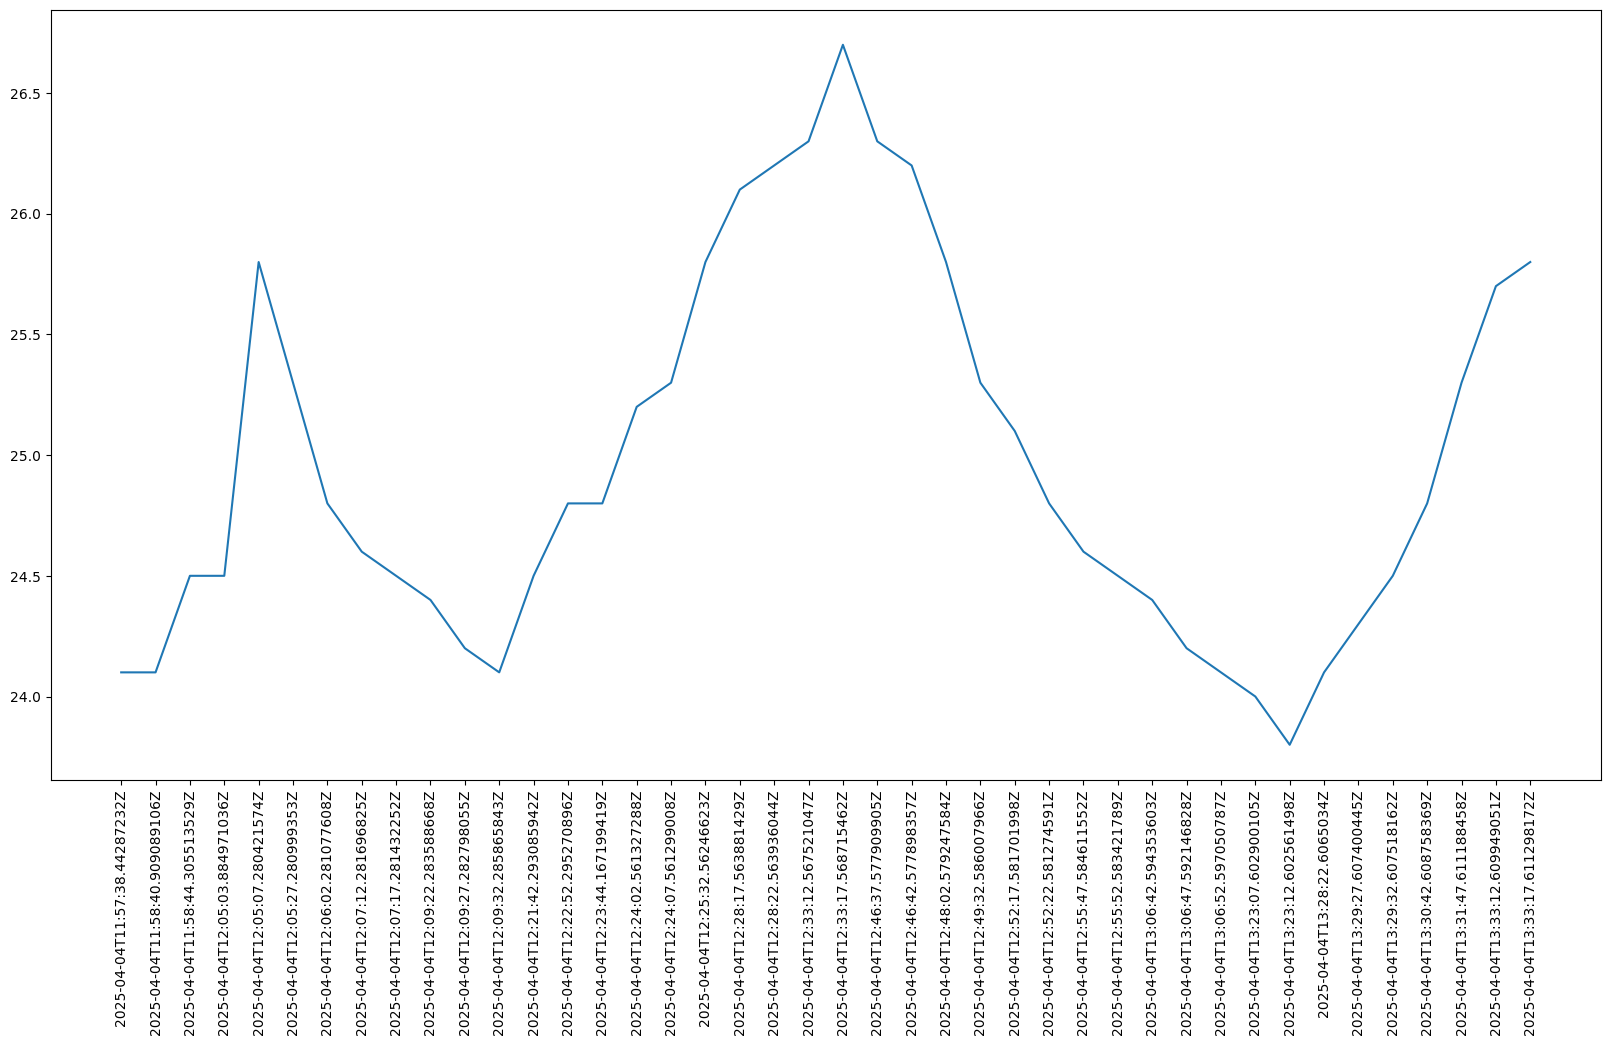

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['temperature'])
plt.xticks(rotation='vertical');

Once the data has been read it can be grouped by the `date` column, and the minimum and maximum temperatures extracted for each date.

In [10]:
# Convert datetimes to pure dates so we can group by the date
df['date'] = pd.to_datetime(df['date']).dt.date

# Group the data by date so it can be analyzed by date
data_by_date = df.groupby('date')

# Get the minimum and maximum temperatures for each date
min_by_date = data_by_date.min()
max_by_date = data_by_date.max()

# Join the min and max temperatures into one dataframe and flatten it
min_max_by_date = min_by_date.join(max_by_date, on='date', lsuffix='_min', rsuffix='_max')
min_max_by_date = min_max_by_date.reset_index()

The GDD can be calculated using the standard GDD equation

In [11]:
def calculate_gdd(row):
    return ((row['temperature_max'] + row['temperature_min']) / 2) - base_temperature

# Calculate the GDD for each row
min_max_by_date['gdd'] = min_max_by_date.apply (lambda row: calculate_gdd(row), axis=1)

# Print the results
print(min_max_by_date[['date', 'gdd']].to_string(index=False))

      date   gdd
2025-04-04 15.25
